# Problem set 2 - Solutions

## Problem 1 - a

The grade of the polynomial is  6
With order  6  the minimum precision of my fit is: 6.438496578109465e-07
Maximum error for my fit is 2.2256746888160706e-05 while least squares' is 2.4018094638700305e-06
The RMS for my fit is 8.438721739830775e-06 while least squares' is 1.2520512682267705e-06


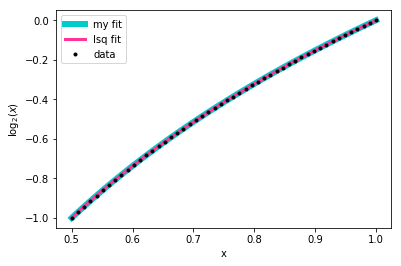

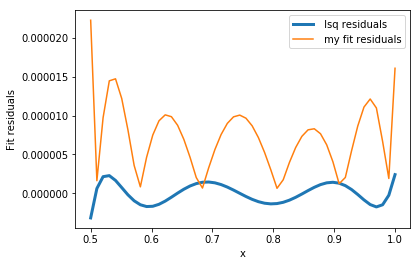

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize

# The data
x = np.linspace(0.5,1.,50)
data = np.log2(x)

################################# My fitting routine
# to fit the model i need to solve the equation m=(A^TA)^{-1}*(A^Td)
# where A is a matrix with the chebyshev polynomials
# so the first step is to build a function that gives me that matrix
# The Chebyshev polynomials follow this recurrence relation:
# T_{n+1}(x) = 2*x*T_n - T_{n-1}, with T_0 = 1, T_1 = x and 
# T_n = cos(n*arccos(x))

def get_chebyshev_matrix(x,npoly):
    A=np.zeros([x.size,npoly])
    A[:,0]=1.0 
    if npoly>1:
        A[:,1] = x
    for i in range(1,npoly-1):
        A[:,i+1] = (2.0*x*A[:,i])-A[:,i-1]
    A=np.matrix(A)
    return A

npoly = 6                           # my guess
print("The grade of the polynomial is ",npoly)
d=np.matrix(data).transpose()       # data array to matrix
A = get_chebyshev_matrix(x,npoly)   # the matrix with the coefficients
lhs=A.transpose()*A                 # the left hand side: A^TA
rhs=A.transpose()*d                 # the right hand side: A^Td
fitp=np.linalg.inv(lhs)*rhs      # invert A^TA and multiply by A^Td
pred=A*fitp                         # data that minimizes chi^2 = A*m

# To check the order of the errors
pred = np.squeeze(np.asarray(pred)) # transform pred matrix to array form
errors = np.abs(pred-data)
print("With order ",npoly," the minimum precision of my fit is:",min(errors))

################################# Least squares routine using Chebyshev.fit
pred2 = np.polynomial.Chebyshev.fit(x,data,npoly)
#params2 = np.polyfit(x,data,npoly)
#pred2=np.poly1d(params2)


################################# Maximum errors comparation
print("Maximum error for my fit is "+repr(max(errors))+" while least squares' is "+repr(max(data-pred2(x))))

################################# RMS errors comparation
# My fit
summation = np.sum((pred-data)**2)
summation_over_n = summation/len(data)
rms_myfit = np.sqrt(summation_over_n)
# Chebyshev fit
summation2 = np.sum((pred2(x)-data)**2)
summation_over_n2 = summation2/len(data)
rms_lsqfit = np.sqrt(summation_over_n2)
print("The RMS for my fit is "+repr(rms_myfit)+" while least squares' is "+repr(rms_lsqfit))

################################# Plotting
plt.plot(x,pred,'#00CCCC',lw=6, label="my fit")                   # my fit
plt.plot(x,pred2(x),"k",lw=3,color="#FF3399", label="lsq fit")
plt.plot(x,data,".",color="black", label="data")           # original data
#plt.plot(x,data-pred2(x), lw=3, label=" lsq residuals")
#plt.plot(x,errors,label=" my fit residuals")
plt.legend(loc="best")
plt.ylabel("$\log_2(x)$")
plt.xlabel("x")
plt.show()
plt.figure()
plt.plot(x,data-pred2(x), lw=3, label=" lsq residuals")
plt.plot(x,errors,label=" my fit residuals")
plt.ylabel("Fit residuals")
plt.xlabel("x")
plt.legend(loc="best")

With 6 terms, the difference between the maximum errors is 1 order of magnitude. The python routine is more precise than mine.

## Problem 1 - b

The minimum precision of my fit is: 8.200781320688577e-08
Maximum error for my fit is 2.2736378014087677e-05 while least squares' is 2.1121947395737195e-06
The RMS for my fit is 7.996082384739102e-06 while least squares' is 1.187557839078558e-06


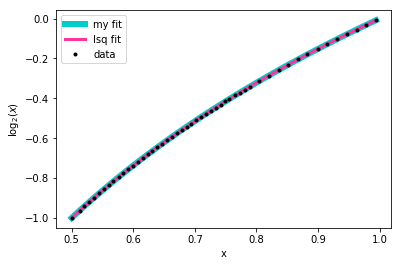

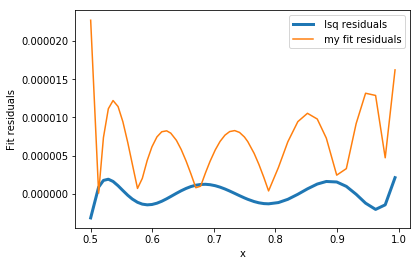

In [126]:
x2 = np.linspace(1,100,50)
mantissa, exponent = np.frexp(x2)
mantissa = np.sort(mantissa)
data2 = np.log2(mantissa)

npol = 6                           
d2=np.matrix(data2).transpose()       
A2 = get_chebyshev_matrix(mantissa,npol)   
lhs2=A2.transpose()*A2                 
rhs2=A2.transpose()*d2                
fitp2=np.linalg.inv(lhs2)*rhs2      
model=A2*fitp2                         

# To check the order of the errors
model = np.squeeze(np.asarray(model)) # transform pred matrix to array form
errors2 = np.abs(model-data2)
print("The minimum precision of my fit is:",min(errors2))

################################# Least squares routine using Chebyshev.fit
model2 = np.polynomial.Chebyshev.fit(mantissa,data2,npol)

################################# Maximum errors comparation
print("Maximum error for my fit is "+repr(max(errors2))+" while least squares' is "+repr(max(data2-model2(mantissa))))

################################# RMS errors comparation
# My fit
summation = np.sum((model-data2)**2)
summation_over_n = summation/len(data2)
rms_myfit = np.sqrt(summation_over_n)
# Chebyshev fit
summation2 = np.sum((model2(mantissa)-data2)**2)
summation_over_n2 = summation2/len(data2)
rms_lsqfit = np.sqrt(summation_over_n2)
print("The RMS for my fit is "+repr(rms_myfit)+" while least squares' is "+repr(rms_lsqfit))

################################# Plotting
plt.plot(mantissa,model,"-",lw=6,color='#00CCCC', label="my fit")                   # my fit
plt.plot(mantissa,model2(mantissa),"-",lw=3,color="#FF3399", label="lsq fit")
plt.plot(mantissa,data2,".",color="black", label="data")           # original data
#plt.plot(x2,data2-model2(x2), lw=3, label=" lsq residuals")
#plt.plot(x2,errors2,label=" my fit residuals")
plt.legend(loc="best")
plt.ylabel("$\log_2(x)$")
plt.xlabel("x")
plt.show()
plt.figure()
plt.plot(mantissa,data2-model2(mantissa), lw=3, label=" lsq residuals")
plt.plot(mantissa,errors2,label=" my fit residuals")
plt.ylabel("Fit residuals")
plt.xlabel("x")
plt.legend(loc="best")


## Problem 2 - a

Here we want to use an exponential decay to model the flare. The formula of the exponential decay is given by:
\begin{equation}
f(x) = f_0e^{-k(t-t_0)}+c
\end{equation}
where $f_0$ is the initial value of the flux before the decay, $k$ is the rate of decay, $t$ is the time, $t_0$ is the initial time, and $c$ is a constant.

The true parameters are: f0=0.09051657448229948 k_fit=63.01556719465234 and c_fit=0.999850822060234


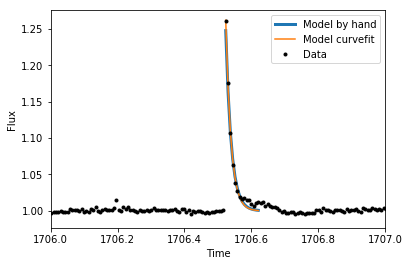

In [130]:
# Create the function to fit
# that receives as arguments t, f0, k and c

def exponential(t,f0,k,c):
    t0 = 1706.54
    return f0*np.exp(-k*(t-t0))+c

# Read the data

time,flux = np.loadtxt("229614158_PDCSAP_SC6.txt", delimiter = ",", usecols=(0,1), unpack=True)


#################################
# This lines are to find the maximum flux and the position of this value
flux_max = np.max(flux)
flux = flux.tolist()
index = flux.index(flux_max)
# this is the time where the maximum flux occurs
t_max = time[index]
#################################

# initial guess with f0,k,t0. The true value for f0 and t0 are given by flux_max and t_max

f0,k,t0,c = 0.09,60,1706.54,1.0

flux_fit = []

flux_curvefit = []

# this is to plot only the region of interest
new_time = time[3200:3215]

################################# Trying with curvefit
opt_parms = sp.optimize.curve_fit(exponential, time[3200:], flux[3200:])
f0_fit = opt_parms[0][0]
k_fit = opt_parms[0][1]
c_fit =  opt_parms[0][2]
print("The true parameters are: f0="+repr(f0_fit)+" k_fit="+repr(k_fit)+" and c_fit="+repr(c_fit))
#################################

for i in range(len(new_time)):
    flux_fit.append(exponential(new_time[i],f0,k,c))
    flux_curvefit.append(exponential(new_time[i],f0_fit,k_fit,c_fit))

################################# Plotting

plt.plot(new_time,flux_fit,"-",lw=3,label="Model by hand")
plt.plot(new_time,flux_curvefit,"-",label="Model curvefit") 
plt.plot(time,flux,".",color="black",label="Data")
plt.xlim(1706,1707)
plt.xlabel("Time")
plt.ylabel("Flux")
plt.legend(loc="best")
plt.show()


The plot above compares the model "by hand", which means that I just took the function
\begin{equation}
f(x) = f_0e^{-k(t-t_0)}+c
\end{equation}
and evaluated at each data point. The values for $f_0$, $k$ and $c$ given to plot the model "by hand" are my initial guess. To have an idea of the true parameters, I also used curve_fit tool and compare with my initial model.

Finally, the model is not linear, since one of the parameters is on the exponent, which means it does not have a linear dependence.

## Problem 2 - b

### The second order Newton's method
The idea of Newton's method is to find the roots of a function (in this case, the $\chi^2$) by following these steps (in 1-dimension):
- Start with a first guess $x_0$ relatively close to the root $f(x)=0$
- Find the derivative at the initial point $f'(x_0)$ and trace the tangent
- Find the point where the tangent crosses the x-axis. Supposedly, this is a better approximation of the root than $x_0$
- Evaluate $f$ in the new point, repeat until the root is reached
A good illustration of the method is shown in the Wikipedia page https://en.wikipedia.org/wiki/Newton%27s_method

On this page is also explained how the next point is found from the Taylor expansion:
\begin{equation}
f(x) = f(x_i)+f'(x_i)(x-x_i)+\frac{f''(x_i)}{2}(x-x_i)^2+...
\end{equation}
Truncating to order 2, and evaluating in $x_{n+1}$:
\begin{equation}
f(x_{i+1}) = f(x_i)+f'(x_i)(x_{i+1}-x_i)
\end{equation}
Because we need that $f(x_{i+1})=0$, combining both equations it is possible to obtain the following point with:
\begin{equation}
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
\end{equation}
Similarly, truncating to order 3:
\begin{equation}
x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}
\end{equation}
In the case of n-dimensions:
\begin{equation}
x_{i+1} = x_i - \frac{\nabla f(x_i)}{\nabla^2 f(x_i)}
\end{equation}
The latter is what we use in this problem:
\begin{equation}
\nabla \chi^2 = -2A'^{T}N^{-1}(d-A(m))
\end{equation}
and
\begin{equation}
\nabla^2 \chi^2 = -2A''^{T}N^{-1}(d-A(m))+2A'^{T}N^{-1}A'
\end{equation}
but since $d=A(m)$ for the best fit, the left term should be 0:
\begin{equation}
\nabla^2 \chi^2 = 2A'^{T}N^{-1}A'
\end{equation}
Note for me: another useful link is https://relate.cs.illinois.edu/course/cs357-f15/file-version/03473f64afb954c74c02e8988f518de3eddf49a4/media/cs357-slides-newton2.pdf

Algorithm for non-linear models in this problem:
- Guess the parameters: m$_0$ => arguments for the function $func\_derivs$
- Calculate the matrix A on the guess parameters: A(m$_0$)
- Calculate the local gradients $\partial A/\partial m$ => this is returned by $func\_derivs$
- Solve $A_m^T \, N^{-1} \, A_m \, \delta m = A_m \, N^{-1} \, r$, where $\partial A/\partial m = A_m$, and $r = d-A(m_0)$
- Set m$_0$ -> m$_0+\delta m$
- Repeat until $\delta m$ is small, and $\chi^2\ll1$

The best fit parameters are f0 = 0.2595392671863343  k = 77.15226421765293  c = 0.999837884843854


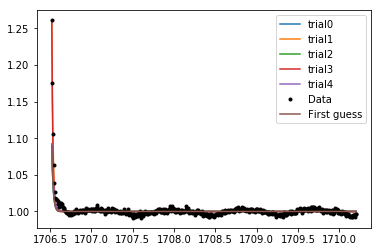

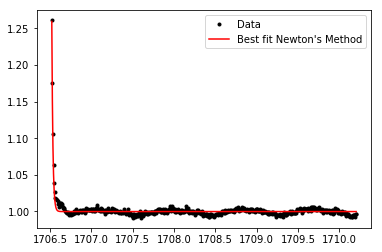

In [131]:
def func_derivs(pars,t):
    #p0 = f0 (flux value at flare)
    #p1 = k (rate of decay)
    #p2 = c (constant)
    f0 = pars[0]
    k = pars[1]
    c = pars[2]
    t0 = 1706.52314133376
    dt = t-t0
    expvec = np.exp(-k*dt)
    fun = f0*expvec+c
    # the derivatives
    d0 = expvec                       # w.r.t f0
    d1 = f0*expvec*(-dt)              # w.r.t k
    d2 = 1.0                          # w.r.t c
    npar = 3
    derivs = np.zeros([len(t),npar])
    derivs[:,0]=d0
    derivs[:,1]=d1
    derivs[:,2]=d2
    return fun,derivs                 # derivs is the derivative of the matrix A

time,flux = np.loadtxt("229614158_PDCSAP_SC6.txt", delimiter = ",", usecols=(0,1), unpack=True)
time = time[3200:]
flux = flux[3200:]
guess = np.asarray([0.09,60.0,1.0])      # f0, k, c
pars = guess.copy()
fun,derivs = func_derivs(guess,time)

chi_old = np.sum((fun-flux)**2)
chi_thresh=0.01
best_fit_pars = []

for i in range(5):
    fun2,derivs = func_derivs(pars,time)
    resid = flux-fun2                                  # calculation of r
    chi_new = np.sum(resid**2)
    grad = 2.0*np.dot(derivs.transpose(),resid)        # calculation of A2*m^T*r
    curve = 2.0*np.dot(derivs.transpose(),derivs)      # calculation of 2nd deriv (curvature)
    pars = guess+np.dot(np.linalg.inv(curve),grad)     # calculation of new guess parameters  
    best_fit_pars.append(pars)
    if (np.abs(chi_old-chi_new)<chi_thresh)&(i>0):
        print("stopping after "+repr(i)+" iterations.")
        break
    chi_old = chi_new
    plt.plot(time,fun2,label="trial"+repr(i))
    plt.legend(loc="best")

print("The best fit parameters are f0 =",best_fit_pars[2][0]," k =",best_fit_pars[2][1]," c =",best_fit_pars[2][2])

################################# Plotting
### Trials + data
plt.plot(time,flux,".",color="black",label="Data")
plt.plot(time,fun,"-",label="First guess")
plt.legend(loc="best")
### Best fit + data
fun3, derivs3 = func_derivs(best_fit_pars[2],time)
plt.figure()
plt.plot(time,flux,".",color="black",label="Data")
plt.plot(time,fun3,"red",label="Best fit Newton's Method")
plt.legend(loc="best")

## Problem 2 - c

Two methods to estimate the errors: adding gaussian noise, or selecting different samples of the data and fitting. Since the first one depends of the width that I give to the gaussian, I think the error is less credible (it is too easy to manipulate), so I will use the second method, changing the samples and fitting with each one.
For each fit, I'll extract the best-fit parameters, calculate the mean and the standard deviation of the 3 of them. This will be the output of the code.

### Using different samples

Mean of f0 is  0.08342648207141103 with approx error  0.012740886126195432
Mean of k is  63.74886192144569 with approx error  3.1125007177886657
Mean of c is  0.8999892197191964 with approx error  2.3550905935472862e-05


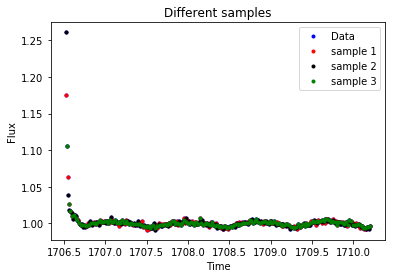

In [12]:
# The real sample
time,flux = np.loadtxt("229614158_PDCSAP_SC6.txt", delimiter = ",", usecols=(0,1), unpack=True)
time = time[3200:]
flux = flux[3200:]

# Taking odd terms
time_sample1 = time[1::2]
flux_sample1 = flux[1::2]

# Taking even terms
time_sample2 = time[::2]
flux_sample2 = flux[::2]

# Taking every 3 terms
time_sample3 = time[2::3]
flux_sample3 = flux[2::3]




def calculator(time_sample,flux_sample):
    """
    returns best fit parameters f0,k,c
    """
    guess = np.asarray([0.09,63.0,0.9])      # f0, k, c
    pars = guess.copy()
    fun,derivs = func_derivs(guess,time_sample)

    chi_old = np.sum((fun-flux_sample)**2)
    chi_thresh=0.01
    best_fit_f0 = []
    best_fit_k = []
    best_fit_c = []
    chis = []
    for i in range(5):
        fun2,derivs = func_derivs(pars,time_sample)
        resid = flux_sample-fun2                                  
        chi_new = np.sum(resid**2)
        chis.append(chi_new)
        grad = 2.0*np.dot(derivs.transpose(),resid)        
        curve = 2.0*np.dot(derivs.transpose(),derivs)      
        pars = guess+np.dot(np.linalg.inv(curve),grad)
        best_fit_f0.append(pars[0])
        best_fit_k.append(pars[1])
        best_fit_c.append(pars[2])
        #print("change in chisq is "+repr(chi_old-chi_new))
        if (np.abs(chi_old-chi_new)<chi_thresh)&(i>0):
            print("stopping after "+repr(i)+" iterations.")
            break
        #plt.plot(time_sample,fun2,label="trial"+repr(i))
        #plt.legend(loc="best")
        chi_old = chi_new
    chi_min = min(chis)
    ind = chis.index(chi_min)
    return best_fit_f0[ind],best_fit_k[ind],best_fit_c[ind]


f0_list = []
k_list = []
c_list = []
times = [time,time_sample1,time_sample2,time_sample3]
fluxes =  [flux,flux_sample1,flux_sample2,flux_sample3]

for i in range(len(times)):
    f0_i,k_i,c_i=calculator(times[i],fluxes[i])
    f0_list.append(f0_i)
    k_list.append(k_i)
    c_list.append(c_i)

# Means and standar deviations of each parameter   
mean_f0 = np.mean(f0_list)
stdv_f0 = np.std(f0_list)
mean_k = np.mean(k_list)
stdv_k = np.std(k_list)
mean_c = np.mean(c_list)
stdv_c = np.std(c_list)
print("Mean of f0 is ",mean_f0,"with approx error ",stdv_f0)
print("Mean of k is ",mean_k, "with approx error ",stdv_k)
print("Mean of c is ",mean_c,"with approx error ",stdv_c)

plt.plot(time,flux,".",color="blue",label="Data")
plt.plot(time_sample1,flux_sample1,".",color="red",label="sample 1")
plt.plot(time_sample2,flux_sample2,".",color="black",label="sample 2")
plt.plot(time_sample3,flux_sample3,".",color="green",label="sample 3")
plt.title("Different samples")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.legend(loc="best")



## Problem 2 - d

Comparing with the fit performed with sp.optimize.curve_fit in part a), the results are within the errors I found. However, I used only 4 samples, which could imply that the errors are not representative. I tried using, for example, samples that take every 4 and 5 terms, but the Newton method did not converge for those, so I did not include them. Another possibility is to add the gaussian noise, but to do it correctly, it is necessary first to take the current "noisy data" (the points outside the flare), and calculate the standard deviation, to then use it for the gaussian noise.